## INSTRUCTIONS 

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution. 

The homework consists of two parts:
1.	Data from our life
2.	Classification

Follow the prompts in the attached jupyter notebook. We are using a clean and modified version of the auto imports dataset (Description of the original dataset is in the cell bellow). Download the auto_imp.csv file from Canvas and put it in your working directory. Don't forget to add libraries to use in your analysis. You can use the code as a guide that was provided in the class. 

Add markdown cells to your analysis to include your solutions, comments, answers. Add as many cells as you need, for easy readability comment when possible. 

**Note:** This homework has a bonus question, so the highest mark that can be earned is a 105.
Submission: Send in both a ipynb and a html file of your work.
Good luck!



**Title: 1985 Auto Imports Database**

Relevant Information:
   -- Description
      This data set consists of three types of entities: (a) the
      specification of an auto in terms of various characteristics, (b)
      its assigned insurance risk rating, (c) its normalized losses in use
      as compared to other cars.  The second rating corresponds to the
      degree to which the auto is more risky than its price indicates.
      Cars are initially assigned a risk factor symbol associated with its
      price.   Then, if it is more risky (or less), this symbol is
      adjusted by moving it up (or down) the scale.  Actuarians call this
      process "symboling".  A value of +3 indicates that the auto is
      risky, -3 that it is probably pretty safe.

      The third factor is the relative average loss payment per insured
      vehicle year.  This value is normalized for all autos within a
      particular size classification (two-door small, station wagons,
      sports/speciality, etc...), and represents the average loss per car
      per year.

   -- Note: Several of the attributes in the database could be used as a
            "class" attribute.

5. Number of Instances: 205

6. Number of Attributes: 26 total
   -- 15 continuous
   -- 1 integer
   -- 10 nominal

7. Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota,volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.

8. Missing Attribute Values: (denoted by "?")

# 1. Data from our lives:

### Describe a situation or problem from your job, everyday life, current events, etc., for which a classification would be appropriate.

## Your answer
my roommate assesing what vegetable curry i like from potato curry and chicken curry based on my previous food preferences


# 2. Preprocessing

In [1]:
## Add libraries to use
import pandas as pd
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings("ignore")
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
from sklearn.dummy import DummyClassifier
#from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

from numpy import mean




In our class we covered multiple classification methods. In this part of the home work you can compare them 

**Use the dataset 'auto_imp.csv' from Canvas. Follow the prompts to complete the homework.**

In [2]:
df2 =pd.read_csv('auto_imp.csv')
df2.tail()

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
190,gas,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
191,gas,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
192,gas,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
193,diesel,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470
194,gas,109.1,188.8,68.9,55.5,3062,141,3.78,3.15,9.5,114,5400,19,25,22625


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    195 non-null    object 
 1   wheel_base   195 non-null    float64
 2   length       195 non-null    float64
 3   width        195 non-null    float64
 4   heights      195 non-null    float64
 5   curb_weight  195 non-null    int64  
 6   engine_size  195 non-null    int64  
 7   bore         195 non-null    float64
 8   stroke       195 non-null    float64
 9   comprassion  195 non-null    float64
 10  horse_power  195 non-null    int64  
 11  peak_rpm     195 non-null    int64  
 12  city_mpg     195 non-null    int64  
 13  highway_mpg  195 non-null    int64  
 14  price        195 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 23.0+ KB


## 2.1 **Replace ['gas', 'diesel'] string values to [0, 1]**

In [4]:
df2["fuel_type"]=df2["fuel_type"].replace(["gas","diesel"],[0,1])
#df2["fuel_type"]=df2["fuel_type"].replace("deisel",1)
df2.tail()

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
190,0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
191,0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
192,0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
193,1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470
194,0,109.1,188.8,68.9,55.5,3062,141,3.78,3.15,9.5,114,5400,19,25,22625


In [5]:
df2

,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
191,0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
192,0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
193,1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


## 2.2 : Define your X and y: your dependent variable is fuel_type, the rest of the variables are your independent variables

In [6]:
x=df2.iloc[:,1:]
y=df2.iloc[:,0]
#print(y)
#print(x)

## 2.3 Split your data into training and testing set. Use test_size=0.3, random_state=746 !

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=746)

In [8]:
bhar = Counter(y_test)
print(bhar)

Counter({0: 50, 1: 9})


# 3. Classification

### 3.1 Use Logistic regression to classify your data. Print/report your confusion matrix, classification report and AUC, what do you notice?

In [9]:
lgr=LogisticRegression()
model_lrg=lgr.fit(x_train,y_train)

In [10]:
y_hat = lgr.predict(x_test)


cf_matrix2=confusion_matrix(y_test, y_hat)

# Evaluate label (subsets) accuracy:
print(accuracy_score(y_test, y_hat))
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat))

cohen3= metrics.cohen_kappa_score(y_test, y_hat)
print('Cohen Kappa: %.3f' % cohen3)

auc_score3 = roc_auc_score(y_test,y_hat)
print('AUC: %.3f' % auc_score3)

1.0
[[50  0]
 [ 0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

Cohen Kappa: 1.000
AUC: 1.000


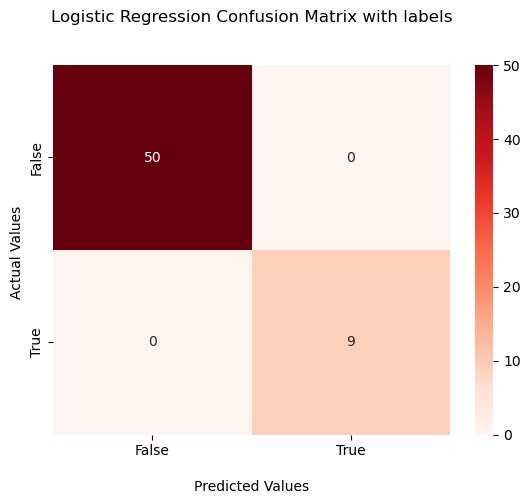

In [11]:
ax = sns.heatmap(cf_matrix2, annot=True, cmap='Reds')

ax.set_title('Logistic Regression Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.savefig("logreg.jpg")
plt.show()

The logistic regression classification classifies the data with accuracy of 100 percent without any errors

### 3.2 Use Naive Bayes to classify your data. Print/report your confusion matrix, classification report and AUC. What do you notice?

In [12]:
gnb = GaussianNB()

# Train the classifier:
model = gnb.fit(x_train, y_train)

In [13]:
predictive_labels = gnb.predict(x_test)

# Evaluate label (subsets) accuracy:
print(accuracy_score(y_test, predictive_labels))

cf_matrix=confusion_matrix(y_test, predictive_labels)

print(confusion_matrix(y_test, predictive_labels))
print(classification_report(y_test, predictive_labels))

cohen3= metrics.cohen_kappa_score(y_test, predictive_labels)
print('Cohen Kappa: %.3f' % cohen3)

auc_score3 = roc_auc_score(y_test,predictive_labels)
print('AUC: %.3f' % auc_score3)

1.0
[[50  0]
 [ 0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

Cohen Kappa: 1.000
AUC: 1.000


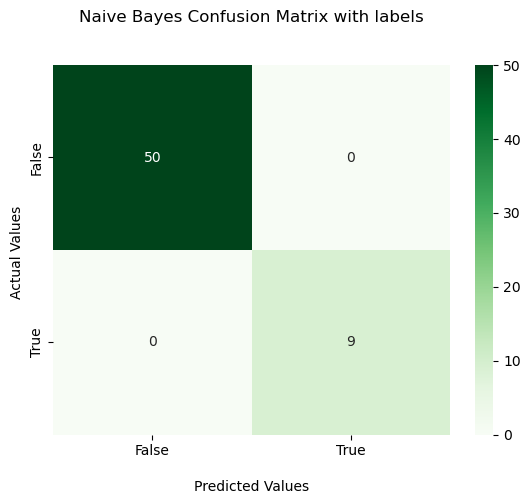

In [14]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Greens')

ax.set_title('Naive Bayes Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.savefig("naive.jpg")
plt.show()

The naive bayes classfication also classifies data with 100% accuracy with out any miss placement of data

### 3.3 Use KNN to classify your data. First find the optimal k and than run you classification. Print/report your confusion matrix, classification report and AUC. What do you notice?

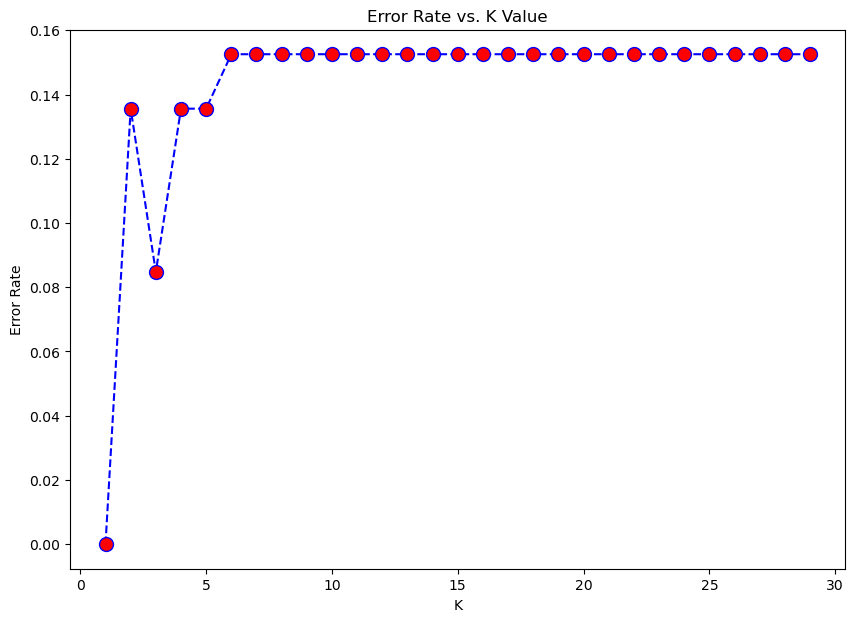

In [15]:
error_rates = []

for a in range(1, 30):
    k = a
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    preds = knn.predict(x_test)
    error_rates.append(np.mean(y_test - preds))
    
#plot error rates against number of neighbors
plt.figure(figsize=(10, 7))
plt.plot(range(1,30),error_rates,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.savefig('knn.png')
plt.show()

In [16]:
k =1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)
preds = knn.predict(x_test)
#Classification report
#from sklearn.metrics import confusion_matrix, classification_report
print(accuracy_score(y_test, preds))
knm=confusion_matrix(y_test, preds)
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

cohen2=metrics.cohen_kappa_score(y_test, preds)
print('Cohen Kappa: %.3f' % cohen2)

auc_score2 = roc_auc_score(y_test,preds)
print('AUC: %.3f' % auc_score2)

0.864406779661017
[[46  4]
 [ 4  5]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        50
           1       0.56      0.56      0.56         9

    accuracy                           0.86        59
   macro avg       0.74      0.74      0.74        59
weighted avg       0.86      0.86      0.86        59

Cohen Kappa: 0.476
AUC: 0.738


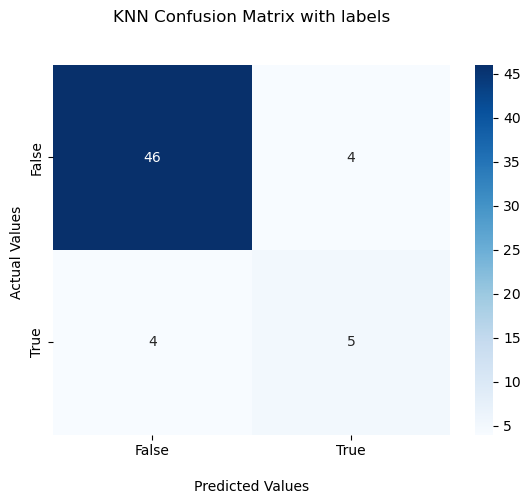

In [17]:
ax = sns.heatmap(knm, annot=True, cmap='Blues')

ax.set_title('KNN Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.savefig("knn.jpg")
plt.show()

Knn classify data with 87 percent accuracy there is 8 errors in classification, so Knn is weak for classification of this data when compared to other classification techniques like logistic,naive bayes 

### 3.4 Choose one: SVM or Random Forest to classify your data. Print/report your confusion matrix, classification report and AUC. What do you notice?

In [18]:
clf = SVC(kernel="linear")
model3=clf.fit(x_train, y_train)

In [19]:
y_pred = clf.predict (x_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
svmm=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
 
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

cohen5=metrics.cohen_kappa_score(y_test, y_pred)
print('Cohen Kappa: %.3f' % cohen5)

auc_score5 = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc_score5)

Accuracy: 1.0
[[50  0]
 [ 0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00         9

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

Precision: 1.0
Recall: 1.0
Cohen Kappa: 1.000
AUC: 1.000


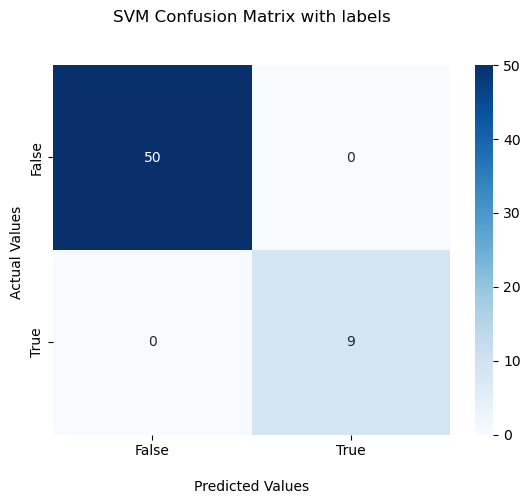

In [31]:
ax = sns.heatmap(svmm, annot=True, cmap='Blues')

ax.set_title('SVM Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.savefig("svmm.jpg")
plt.show()

SVM classification classfies data with 100 percent accuracy if only if kernal in svm is linear or else  if kernal is any other type accuracy drops to 85 to 50 percent which is shown in below coding part.

In [21]:
clf = SVC()
model3=clf.fit(x_train, y_train)

In [22]:
y_pred = clf.predict (x_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
 
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

cohen5=metrics.cohen_kappa_score(y_test, y_pred)
print('Cohen Kappa: %.3f' % cohen5)

auc_score5 = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc_score5)

Accuracy: 0.847457627118644
[[50  0]
 [ 9  0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        50
           1       0.00      0.00      0.00         9

    accuracy                           0.85        59
   macro avg       0.42      0.50      0.46        59
weighted avg       0.72      0.85      0.78        59

Precision: 0.0
Recall: 0.0
Cohen Kappa: 0.000
AUC: 0.500


In [23]:
clf = SVC(kernel="poly")
model3=clf.fit(x_train, y_train)

In [24]:
y_pred = clf.predict (x_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
 
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

cohen5=metrics.cohen_kappa_score(y_test, y_pred)
print('Cohen Kappa: %.3f' % cohen5)

auc_score5 = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc_score5)

Accuracy: 0.847457627118644
[[50  0]
 [ 9  0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        50
           1       0.00      0.00      0.00         9

    accuracy                           0.85        59
   macro avg       0.42      0.50      0.46        59
weighted avg       0.72      0.85      0.78        59

Precision: 0.0
Recall: 0.0
Cohen Kappa: 0.000
AUC: 0.500


In [25]:
clf = SVC(kernel="rbf")
model3=clf.fit(x_train, y_train)

In [26]:
y_pred = clf.predict (x_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
 
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

cohen5=metrics.cohen_kappa_score(y_test, y_pred)
print('Cohen Kappa: %.3f' % cohen5)

auc_score5 = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc_score5)

Accuracy: 0.847457627118644
[[50  0]
 [ 9  0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        50
           1       0.00      0.00      0.00         9

    accuracy                           0.85        59
   macro avg       0.42      0.50      0.46        59
weighted avg       0.72      0.85      0.78        59

Precision: 0.0
Recall: 0.0
Cohen Kappa: 0.000
AUC: 0.500


This is how svm classification works and gives different accuracies based on different kernal types

### 3.5 Compare your results and comment on your findings. Which one(s) did the best job? What could have been the problem with the ones that did not work? etc.

->by comparing different classification algorithems to classify auto_imp dataset, i came to know that logistic regression and naive bayes works exceptionally well with accuracy of 100 percent
->while svm with kernal linear works pretty well with 100 percent accuracy but svm with default model and kernal "rbf","poly" parameter gives less accuracy of 85 percent and 51 percentages each so svm where  kernal is linear is best to classify auto_imp data
->and knn works with accuracy of 87 percent where k=1, which is pretty bad when compared to logistic,naive bayes and svm with linear kernal. i used K=1 as it is giving least error
->so by observing above classification techniques i came to know naive bayes,logistic and svm where kernal is linear did very good job of classification and knn gives bad result it may be due to k value is small so that it is effected by noise or may be due to some clustering issues of imbalance data and the data can be classified with linear kernal in svm pretty good the other kernal types doesnt work as that because of there complexity and inflexibility.


## 4. Bonus question (5 extra points)
**Try to fix the inbalanced nature of the data with a tool from the lecture. Run one of the classification methods (preferable one that "failed" before) and see if you get better results.**

as data is imbalance all we can do is undersampling and oversampling of data to make data balanced, i prefer oversampling because we don't loss any data during the process.as data is used for many different things and we can't obtain data easily.  

In [27]:
ros = RandomOverSampler(random_state=42)
x_os, y_os = ros.fit_resample(x, y)

In [28]:
x_tra, x_test, y_tra, y_test = train_test_split(x_os, y_os, test_size=0.3, random_state=746)

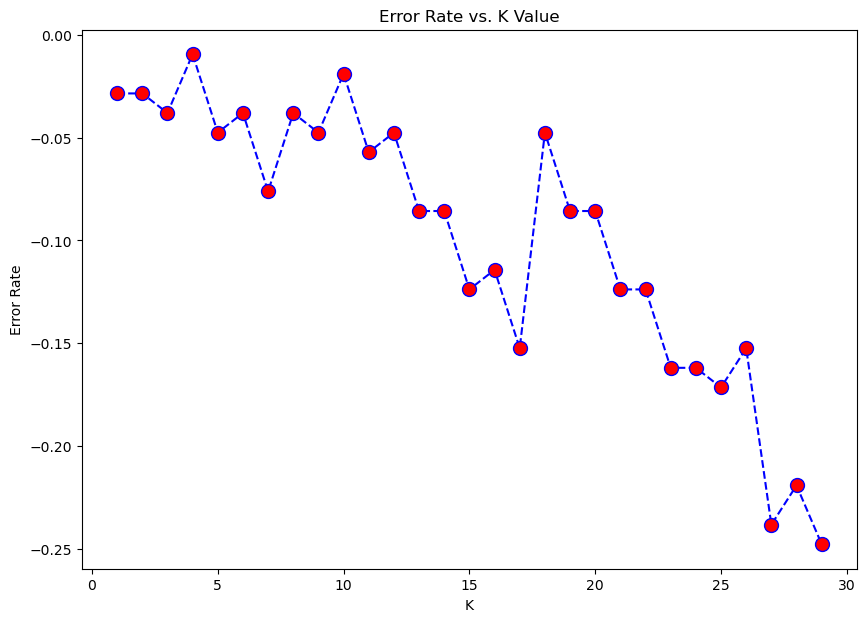

In [29]:
error_rates = []

for a in range(1, 30):
    k = a
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_tra, y_tra)
    preds = knn.predict(x_test)
    error_rates.append(np.mean(y_test - preds))
    
#plot error rates against number of neighbors
plt.figure(figsize=(10, 7))
plt.plot(range(1,30),error_rates,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.savefig('knn.png')
plt.show()

In [30]:
k =1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_tra, y_tra)
preds = knn.predict(x_test)
#Classification report
#from sklearn.metrics import confusion_matrix, classification_report
print(accuracy_score(y_test, preds))
knm=confusion_matrix(y_test, preds)
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

cohen2=metrics.cohen_kappa_score(y_test, preds)
print('Cohen Kappa: %.3f' % cohen2)

auc_score2 = roc_auc_score(y_test,preds)
print('AUC: %.3f' % auc_score2)

0.9714285714285714
[[51  3]
 [ 0 51]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.94      1.00      0.97        51

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105

Cohen Kappa: 0.943
AUC: 0.972


-> the knn which doesn't work well for imbalance data gives better result for balanced data with accuracy of 97 percentage with same k value.